Machine Learning & Preditions

In [61]:
# In this notebook I will do the following:
# Standardize the data
# Split into training data & test data
# Find best Hyperparamaters for SVM, Classification Trees, and Logistic Regression
# Find the method that performs best using the test data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# Load in the data
df = pd.read_csv('f9_data_3.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,marker_color
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,red
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,red
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,red
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,red
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,red


In [63]:
# Create a NumPy array from the column landing_class in the data
Y = df['landing_class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [64]:
# Standarize the data in X then reassign it to X. This makes for consistent understanding and comparisons
transform = preprocessing.StandardScaler()

# Fit the StandardScaler to X and transform the data
# Now, standardize the numerical columns
X_numeric = df.select_dtypes(include=[float, int])
X = transform.fit_transform(X_numeric)
X[0:5]


array([[-1.73641465,  0.        , -0.65391284, -1.57589457, -0.76452913,
         0.4114305 , -0.417073  , -1.41421356],
       [-1.66761548, -1.18972425, -0.65391284, -1.57589457, -0.76452913,
         0.4114305 , -0.417073  , -1.41421356],
       [-1.59881631, -1.15742336, -0.65391284, -1.57589457, -0.76452913,
         0.4114305 , -0.417073  , -1.41421356],
       [-1.56441672, -1.19503689, -0.65391284, -1.57589457, -0.76452913,
        -2.43373648,  2.43363721, -1.41421356],
       [-1.53001713, -0.62764622, -0.65391284, -1.57589457, -0.76452913,
         0.4114305 , -0.417073  , -1.41421356]])

In [65]:
# Split the data into training (80%) and testing (20%) data
# This gives us 18 test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
Y_test.shape

(18,)

In [66]:
# Now we can create a logicstic regression object and a grid search object
# We can fit the object with best parameters using the param dictionary
param ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
# Create the logistic regression object
logreg = LogisticRegression()

# Set up the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param, cv=10)

# Fit the GridSearchCV object to the data (assuming X_train and Y_train are defined)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [67]:
# We can display the best parameters and the accuracy
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 1.0


In [68]:
# Now I can calculate the accuracy on the test data
accuracy = logreg_cv.score(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


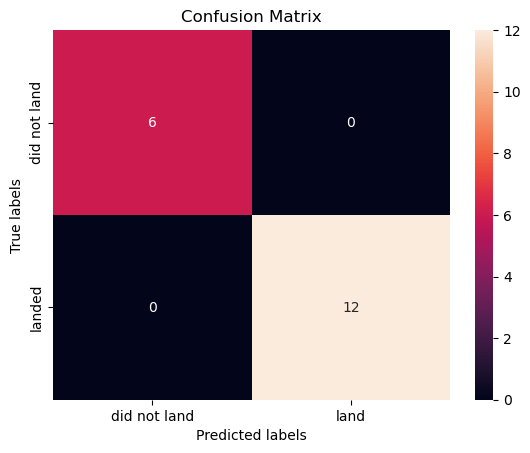

In [69]:
# Make a function to plot the confusion matrix
# We can see the 100% test accuracy with the predicted and true labels matching up
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [70]:
# Now I will make a decision tree classifier
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create the DecisionTreeClassifier object
tree = DecisionTreeClassifier()

# Create the GridSearchCV object with cv = 10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
tree_cv.fit(X, Y)  # Assuming X is your feature set and y is your target variable

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [71]:
# To see the best parameters found
print("Best parameters found: ", tree_cv.best_params_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [72]:
accuracy = tree_cv.score(X_test, Y_test)
accuracy

1.0

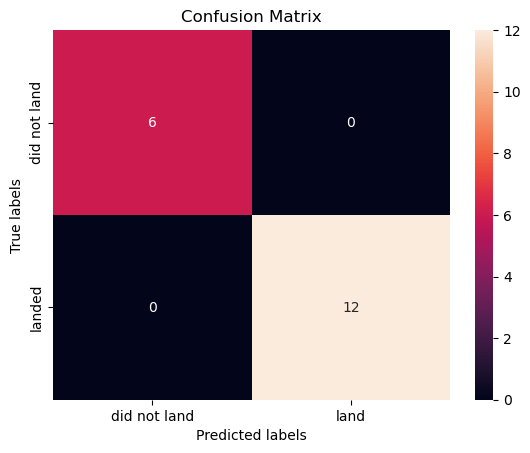

In [73]:
# We can see that a decision tree works as well
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [74]:
# Now I will use the K nearest neighbor method
# Define the parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create the GridSearchCV object with cv = 10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X, Y)  # Assuming X is your feature set and y is your target variable

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [75]:
# To see the best parameters found
print("Best parameters found: ", knn_cv.best_params_)

Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}


In [76]:
accuracy = knn_cv.best_score_
accuracy

0.9777777777777779

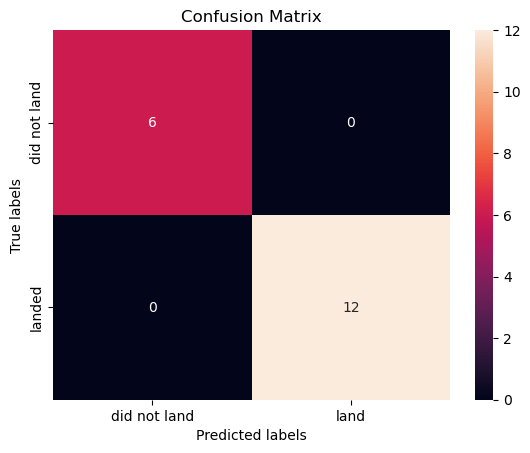

In [77]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [78]:
# Find out the best model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logreg_cv.fit(X_train, Y_train)
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print(f"Log Regression Accuracy: {logreg_accuracy:.4f}")

# Fit the decision tree model
tree_cv.fit(X_train, Y_train)
tree_accuracy = tree_cv.score(X_test, Y_test)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")

# Fit the k-nearest neighbors model
knn_cv.fit(X_train, Y_train)
knn_accuracy = knn_cv.score(X_test, Y_test)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")



Log Regression Accuracy: 0.6667
Decision Tree Accuracy: 0.6111
K-Nearest Neighbors Accuracy: 0.6667


In [79]:
# From the results above on the test data, Logistic Regression and K-Nearest Neighbor are the most accurate
# Those two models will be the most ideal when trying to predict landing success rate